In [33]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
from matplotlib import pyplot as plt
import matplotlib
from spectral_cube import SpectralCube
from astropy import units as u 
import aplpy 

from scipy import misc,ndimage
import copy
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
SMALL_SIZE =  22
MEDIUM_SIZE = 22
BIGGER_SIZE = 25
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', linewidth=2)
plt.rc('font', weight='medium',style='normal',family='Arial')
SMALL_SIZE =  25
MEDIUM_SIZE = 25
BIGGER_SIZE = 25
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', linewidth=2)
plt.rc('font', weight='medium',style='normal',family='Arial')


In [2]:
import scipy
from scipy import misc
from scipy.ndimage import rotate
data = fits.open('2366_5_filtered_preprocessed_small.fits')

In [3]:
mask = fits.open('2366_5_filtered_preprocessed_small_mask.fits')

In [4]:
mask[0].header['CTYPE3'] = 'VRAD '
mask[0].header['CUNIT3'] = 'km/s'
mask[0].header['CRVAL3'] =   (2.9627116198E+06)/1000                                                 
mask[0].header['CDELT3'] =  (1717.62153050)/1000     

In [5]:
data[0].header['CTYPE3'] = 'VRAD '
data[0].header['CUNIT3'] = 'km/s'
data[0].header['CRVAL3'] =   (2.9627116198E+06)/1000                                                 
data[0].header['CDELT3'] =  (1717.62153050)/1000     
data[0].data[mask[0].data < 0.5] = float('NaN')

In [6]:
cube_data = SpectralCube.read(data) 

In [7]:
moment_0data = cube_data.moment(order=0)  # Zero-th moment
moment_1data = cube_data.moment(order=1)  # First moment
m0_data=moment_0data.hdu  
m1_data=moment_1data.hdu  


/home/aditya/anaconda3/lib/python3.9/site-packages/spectral_cube/_moments.py:168: RuntimeWarning: invalid value encountered in true_divide
  return (np.nansum(data * pix_cen, axis=axis) /


In [8]:
tirific = fits.open('Finalmodel.fits')
tirific[0].header['CTYPE3'] = 'VRAD '
tirific[0].header['CUNIT3'] = 'km/s'
tirific[0].header['CRVAL3'] =   (2.9627116198E+06)/1000                                                 
tirific[0].header['CDELT3'] =    (1717.62153050)/1000                                                   
tirific[0].header['CRPIX3'] =160
                    
tirific[0].data[mask[0].data < 0.9] = float('NaN')
cube_tirific = SpectralCube.read(tirific) 


In [9]:
moment_0tirific = cube_tirific.moment(order=0)  # Zero-th moment
moment_1tirific = cube_tirific.moment(order=1)  # First moment
m0_tirific=moment_0tirific.hdu  
m1_tirific=moment_1tirific.hdu  

/home/aditya/anaconda3/lib/python3.9/site-packages/spectral_cube/_moments.py:168: RuntimeWarning: invalid value encountered in true_divide
  return (np.nansum(data * pix_cen, axis=axis) /


In [38]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.interpolate import interp1d
from scipy import interpolate
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
matplotlib.rcParams['font.family'] = "sans-serif"
SMALL_SIZE =  22
MEDIUM_SIZE = 22
BIGGER_SIZE = 15
SMALL_SIZE =  18
MEDIUM_SIZE = 22
BIGGER_SIZE = 15
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('axes', linewidth=2)
plt.rc('font', weight='medium',style='normal',family='Arial')

In [39]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

INFO: Auto-setting vmin to -6.759e-02 [aplpy.core]
INFO: Auto-setting vmax to  6.259e-01 [aplpy.core]
INFO: Auto-setting vmin to  2.709e+03 [aplpy.core]
INFO: Auto-setting vmax to  2.957e+03 [aplpy.core]


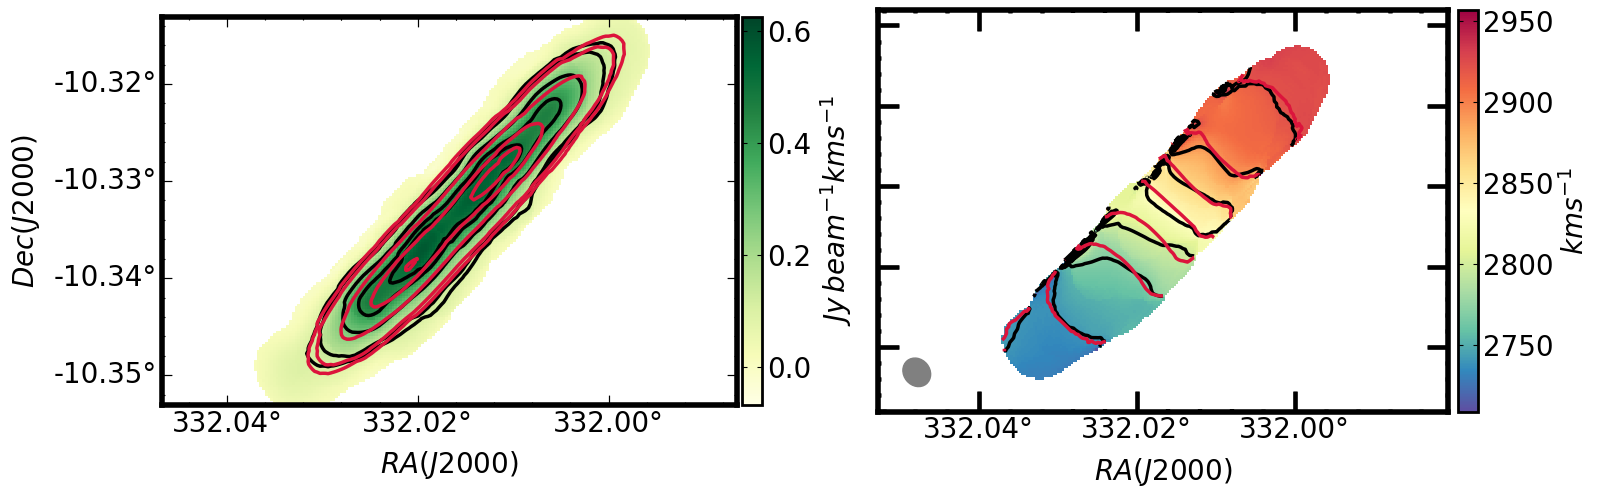

In [68]:
## hw=0.18
vw=0.25
fig = plt.figure(figsize=(20, 9))
import matplotlib as mpl
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
#l0=3*rms0
#lev=[l0,3*l0,6*l0,12*l0,24*l0,48*l0,96*l0]
cmin=0.035
levels=[3.0*cmin,4.0*cmin,8*cmin,12*cmin,14*cmin]
lev=levels


img='optical.fits'
imc=fits.open(img)
RA=data[0].header['CRVAL1']
DEC=data[0].header['CRVAL2']
m1p1 = aplpy.FITSFigure(m0_data,subplot=[0.1,0.7,0.30,0.45],auto_rcminefresh=True,figure=fig)
m1p1.show_contour(m0_data,linewidths=2.5,levels=lev,colors=['black'])
m1p1.show_contour(m0_tirific,linewidths=2.5,levels=lev,colors=['crimson'],linestyles='solid',alpha=1.0)
m1p1.set_theme('publication')
m1p1.recenter(RA, DEC, radius=0.020)
m1p1.show_colorscale(cmap='YlGn')
#m1p1.ticks.set_length(15)
#m1p1.ticks.set_length(15)
#m1p1.ticks.set_linewidth(3)
m1p1.ticks.set_color=('black')
m1p1.tick_labels.set_xformat('dd.dd')
m1p1.tick_labels.set_yformat('dd.dd')
m1p1.frame.set_linewidth(4)
m1p1.tick_labels.set_xposition('bottom')

m1p1.axis_labels.set_xtext('$RA(J2000)$')
m1p1.axis_labels.set_ytext('$Dec(J2000)$')
m1p1.add_colorbar(location='right')
m1p1.colorbar.set_font(size=20)
m1p1.colorbar.set_axis_label_font(size=20, weight='bold')
m1p1.colorbar.set_axis_label_text('$ Jy\,beam^{-1} kms^{-1}$')


import matplotlib as mpl
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
velmin = 2710
velmax = 2951
lev = np.linspace(velmin, velmax, num=(velmax-velmin)//26)
RA=data[0].header['CRVAL1']
DEC=data[0].header['CRVAL2']
m2 = aplpy.FITSFigure(m1_data,auto_refresh=True,subplot=[0.458,0.69,0.30,0.47],figure=fig)
m2.show_contour(m1_data,linewidths=2.5,levels=lev,colors=['black'])
m2.show_contour(m1_tirific,linewidths=2.5,levels=lev,colors=['crimson'],linestyles='solid',alpha=1.0)
m2.set_theme('publication')
m2.recenter(RA, DEC, radius=0.025)
m2.show_colorscale(cmap='Spectral_r')

m2.tick_labels.set_xformat('dd.dd')
m2.tick_labels.set_yformat('dd.dd')
m2.frame.set_linewidth(4)
m2.add_colorbar(location='right')
m2.colorbar.set_font(size=20)
m2.colorbar.set_axis_label_font(size=20, weight='bold')
m2.colorbar.set_axis_label_text('$ kms^{-1}$')
m2.add_beam()
m2.beam.set_color('gray')
m2.axis_labels.set_xtext('$RA(J2000)$')
m2.ticks.set_color=('black')
m2.tick_labels.set_yposition('right')
m2.axis_labels.set_yposition('right')
m2.colorbar.set_pad(0.1)
m2.axis_labels.hide_y()
m2.tick_labels.hide_y()


#m2.ticks.set_xspacing(0.02)

#m2.ticks.set_minor_frequency(10, yfrequency=10)

m2.ticks.set_length(15,minor_factor=5)
m2.ticks.set_linewidth(3)

m2.savefig('moment_compare.pdf',dpi=300)

In [66]:
res0=(m0_data.data-m0_tirific.data)
res1=(m1_data.data-m1_tirific.data)